In [2]:
from IPython.display import Image

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 트리 트리오 중간값

- 프로그래머스 **트리** 문제
- 링크: https://programmers.co.kr/learn/courses/30/lessons/68937
- BFS

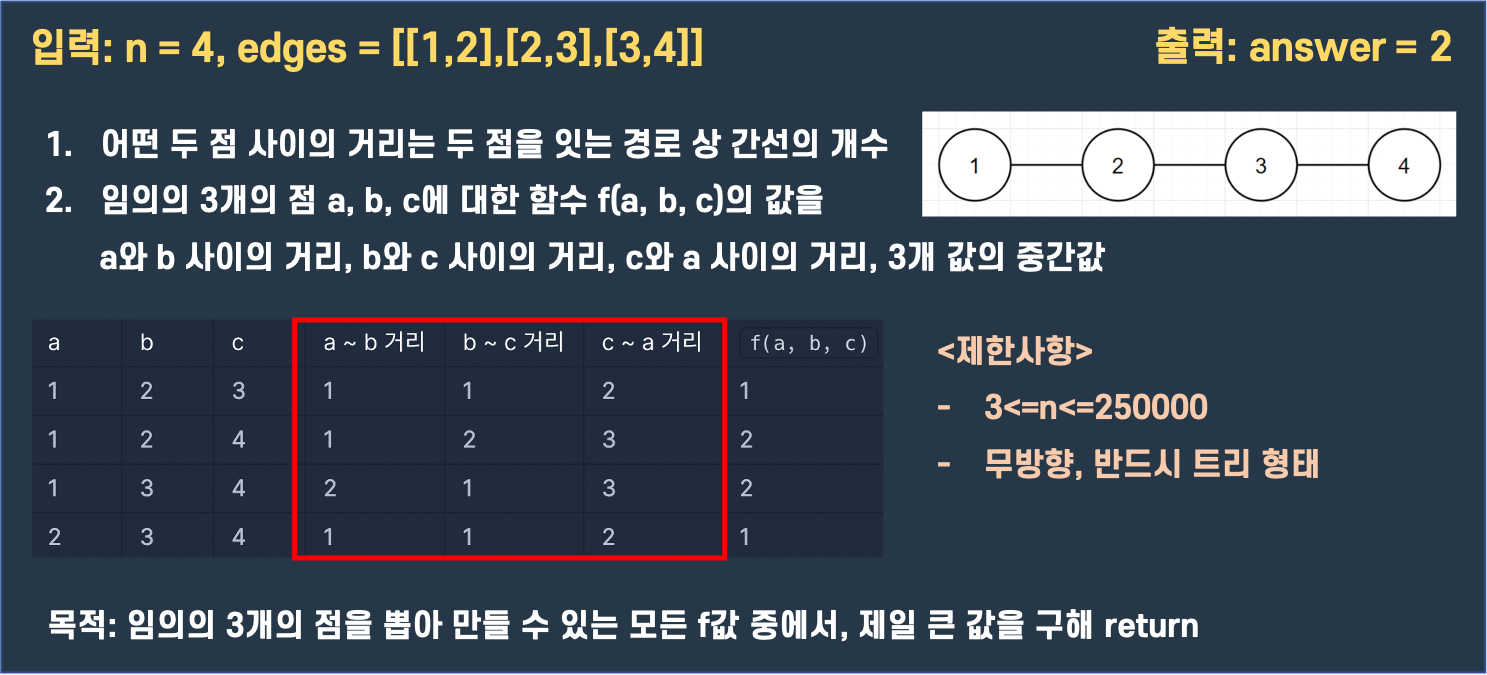

In [3]:
Image("/content/gdrive/My Drive/스터디-알고리즘/_Data/8-summary.png", height=400)

## 풀이 방법

### 1. 임의의 노드 1로부터 가장 먼 노드 A를 찾는다. - BFS
### 2. A로부터 각 노드까지의 거리를 찾는다 - BFS
##### -    이 때 가장 먼 거리의 노드가 여러개라면 A노드와 먼 노드 중 2개를 선택하면 되므로 가장 먼 거리 리턴
##### -    가장 먼 거리의 노드가 B 하나라면 다시 B 를 기준으로 탐색
### 3. B로부터 각 노드까지의 거리를 찾는다 - BFS
##### -    이 때 역시 가장 먼 거리의 노드가 여러개라면 B노드와 먼 노드 중 2개를 선택하면 되므로 가장 먼 거리 리턴
##### -    가장 먼 거리의 노드가 A 하나라면 A와 B의 거리(트리의 지름)-1을 리턴

<br>
<br>
<br>





# 문제풀이
<br>

In [ ]:
n = 4; edges = 	[[1,2],[2,3],[3,4]]

In [ ]:
T = {} # tree dict

for [s,e] in edges: # graph 채우기
    T.setdefault(s, []).append(e)
    T.setdefault(e, []).append(s)

In [ ]:
T

{1: [2], 2: [1, 3], 3: [2, 4], 4: [3]}

In [ ]:
from collections import deque
# def BFS_D():

fnode = list(T.keys())[0] # first node

Q = deque()
Q.append(fnode)

ch = [0]*(n+1)
ch[fnode] = 1

D = [-1]*(n+1)
D[fnode] = 0

while Q:
    now = Q.popleft()

    for v in T[now]:
        if ch[v] == 0: # 한 번도 방문하지 않은 노드인 경우
            Q.append(v) # 큐에 추가
            ch[v] = 1 # 체크리스트에 1로 표시
            D[v] = D[now] + 1 # 부모 노드와의 거리 + 1 = 자식 노드와의 거리

In [ ]:
D

[-1, 0, 1, 2, 3]

<br>
<br>
<br>





# 최종풀이
<br>

In [ ]:
from collections import deque

# BFS_D 코드, 입력 노드로부터 다른 노드 사이의 거리 Distance List 반환
def BFS_D(T, fnode, n):

    Q = deque()
    Q.append(fnode) # 첫 번째 key

    ch = [0]*(n+1)
    ch[fnode] = 1

    D = [-1]*(n+1)
    D[fnode] = 0

    while Q:
        now = Q.popleft()

        for v in T[now]:
            if ch[v] == 0:
                Q.append(v)
                ch[v] = 1
                D[v] = D[now] + 1

    return D


def solution(n, edge):
    answer = 0

    # 연결 트리
    T = {} # tree dict

    for [s,e] in edges: # graph 채우기
        T.setdefault(s, []).append(e)
        T.setdefault(e, []).append(s)
    
    # 처음 임의의 노드에서 가장 먼 노드 A 구하기
    fnode = list(T.keys())[0]
    DIS_F = BFS_D(fnode) # Distance
    A = DIS_F.index(max(DIS_F)) # 처음 하나만

    # A로부터 가장 먼 노드 찾고
    #   1. 두 개 이상이면 가장 먼 거리 리턴
    #   2. 하나라면 B로 두고 다시 찾기
    DIS_A = BFS_D(A)
    if DIS_A.count(max(DIS_A)) >= 2:
        answer = max(DIS_A)
    else:
        B = DIS_A.index(max(DIS_A))
        DIS_B = BFS_D(B)
        if DIS_B.count(max(DIS_B)) >= 2:
            answer = max(DIS_B)
        else:
            answer = DIS_B[A] - 1
  
    return answer

In [ ]:
n = 4; edges = 	[[1,2],[2,3],[3,4]]
solution(n, edges)

2

In [ ]:
n = 5; edges = [[1,5],[2,5],[3,5],[4,5]]
solution(n, edges)

2

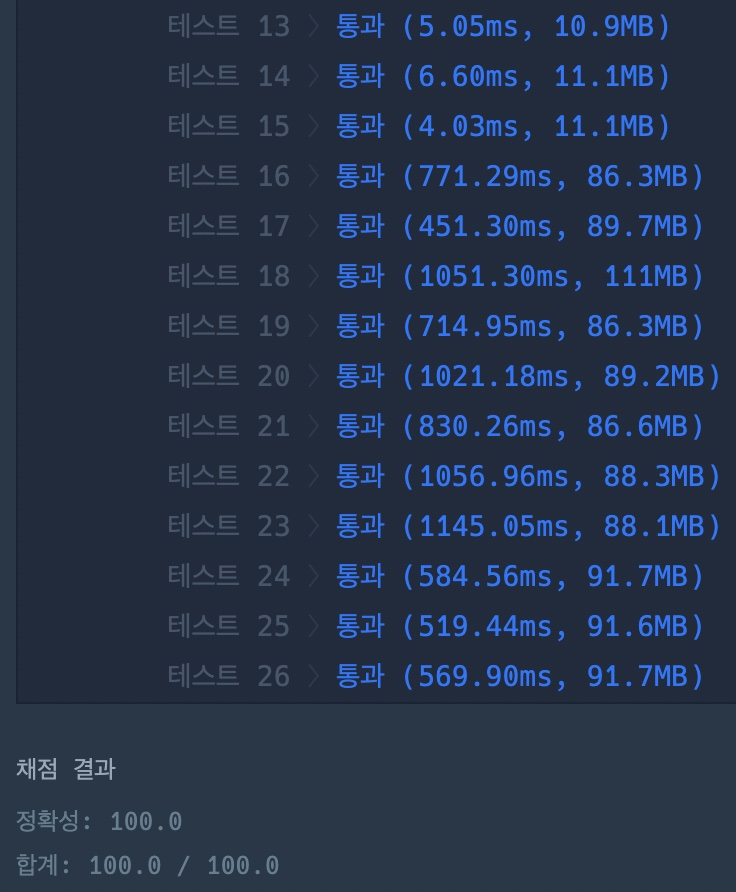

In [5]:
Image("/content/gdrive/My Drive/스터디-알고리즘/_Data/8-success.jpg", height=350)